In [1]:
#coding:utf-8
import os
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
anime_csv = '../sample_data/anime.csv'

df = pd.read_csv(anime_csv)

df.head(20)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


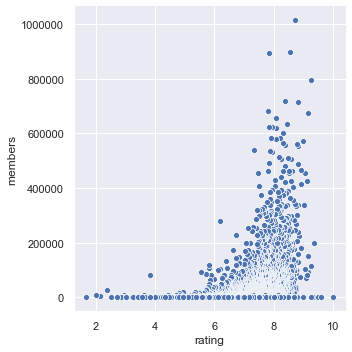

In [3]:
# シンプルな散布図
sns.relplot(x="rating", y="members", data=df);

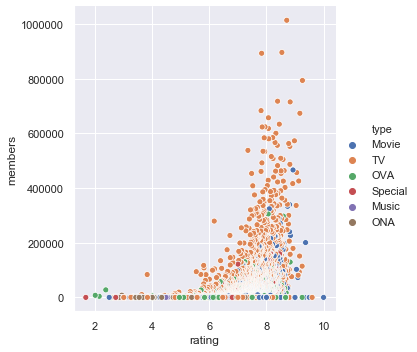

In [4]:
# シンプルな散布図(typeで色分け)
sns.relplot(x="rating", y="members", data=df, hue="type");

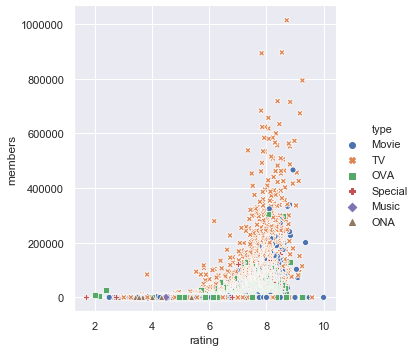

In [5]:
# シンプルな散布図(typeで色分けしてさらにtypeで形分け)
sns.relplot(x="rating", y="members", data=df, hue="type", style="type");

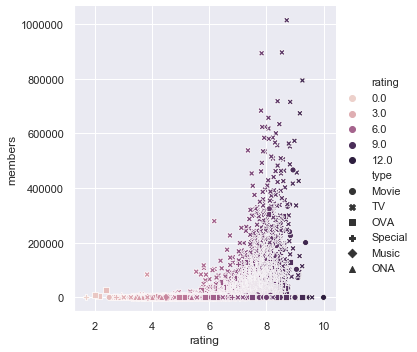

In [6]:
# シンプルな散布図(typeで色分けしてさらにtypeで形分けでも、hueとstyleをわけるとわかりづらくなるのでバッドノウハウ)
sns.relplot(x="rating", y="members", data=df, hue="rating", style="type");

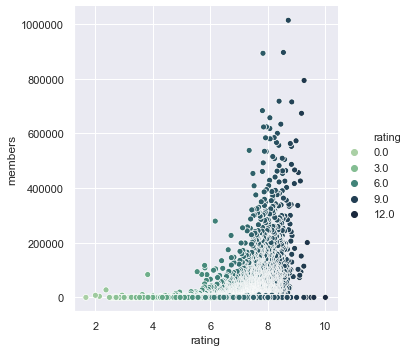

In [7]:
# シンプルな散布図(typeで色分けして カラーパレットを調整)
sns.relplot(x="rating", y="members", data=df, hue="rating", palette="ch:r=-.5,l=.75");

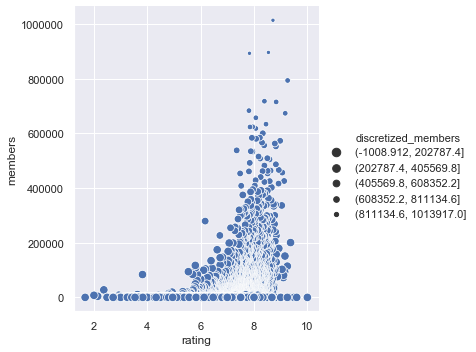

In [8]:
# シンプルな散布図(typeで色分けして カラーパレットを調整。値によってsizeを指定するサンプル)
df['discretized_members'] = pd.cut(df['members'], 5)
sns.relplot(x="rating", y="members", data=df, size='discretized_members');

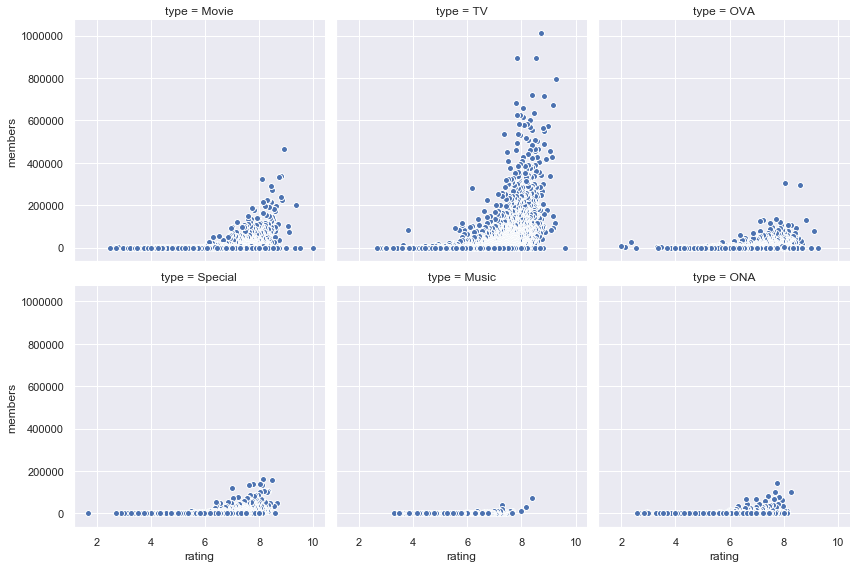

In [9]:
g = sns.FacetGrid(df, col='type', col_wrap=3, height=4)
g = g.map(plt.scatter, 'rating', 'members', edgecolor='white')

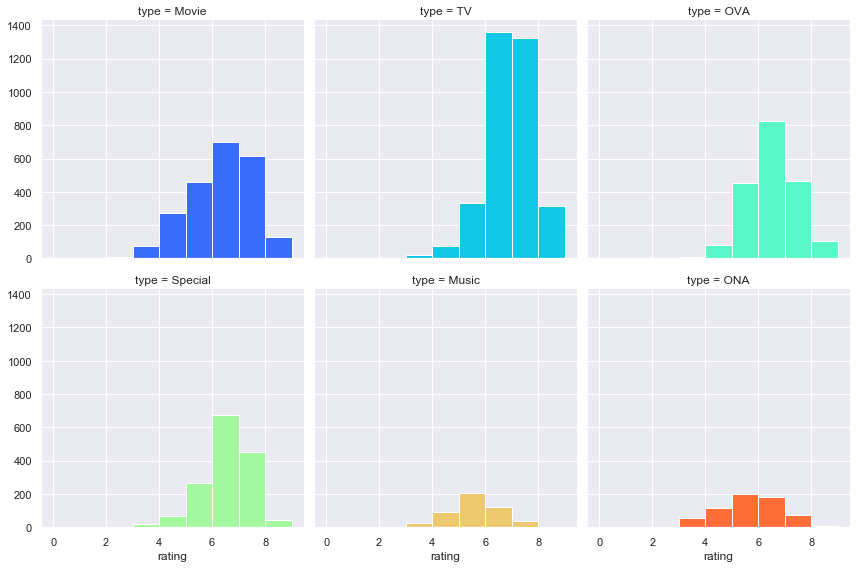

In [10]:
g = sns.FacetGrid(df, col='type',col_wrap=3, height=4, hue='type',palette='rainbow')
g = g.map(plt.hist, 'rating', bins=np.arange(0, 10, 1))